### Import necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dummy Dataset

In [6]:
df = pd.read_csv("Dummy_Dataset.csv")
df.head(5)

,Name,Age,Height_cm,Weight_kg,Department,Score
0,Alice,25,165,55,Sales,88
1,Bob,30,180,85,Engineering,92
2,Charlie,35,175,78,HR,95
3,Diana,40,160,60,Engineering,70
4,Eve,22,155,50,Sales,85


### Plotting

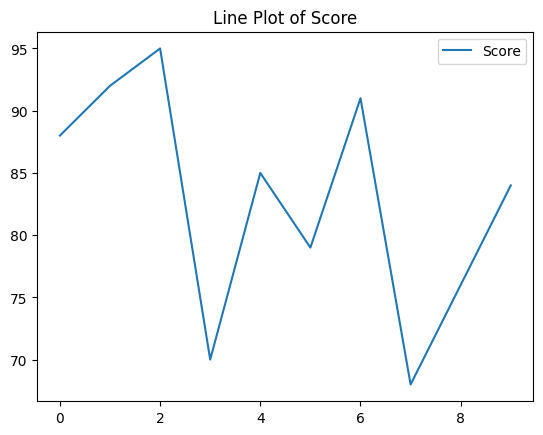

In [11]:
# Line plot of Score
df.plot(y ="Score" , title = "Line Plot of Score")
plt.show()

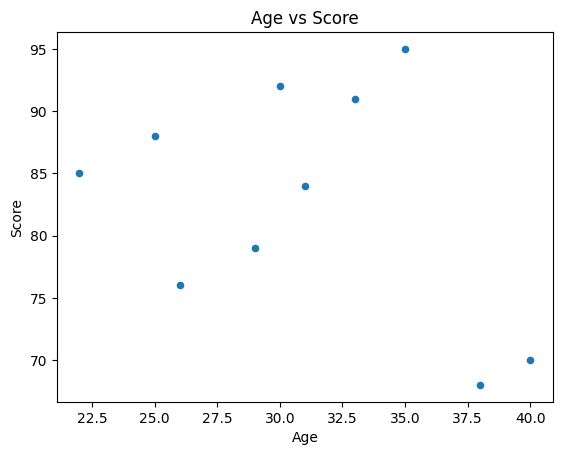

In [ ]:
# Scatter plot
df.plot.scatter(x = "Age" , y= "Score" , title = "Age vs Score")
plt.show()

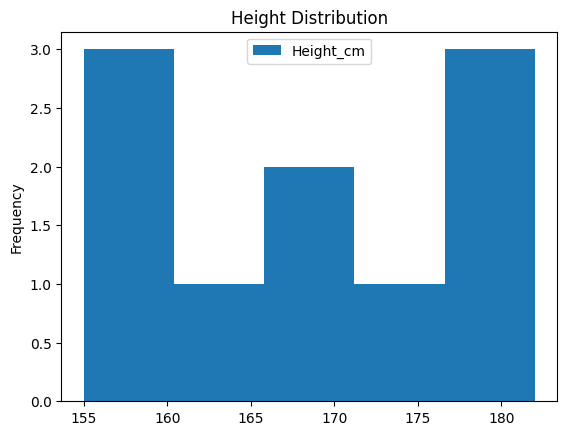

In [13]:
# Histogram of Height
df.plot.hist(y= "Height_cm" , bins = 5, title = "Height Distribution")
plt.show()

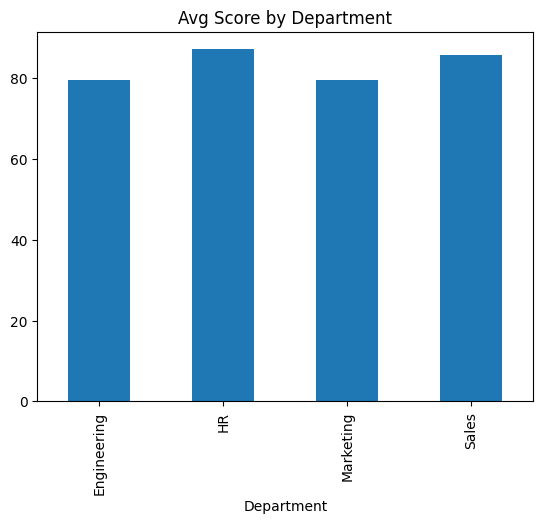

In [14]:
# Bar plot
df.groupby("Department")["Score"].mean().plot.bar(title='Avg Score by Department')
plt.show()

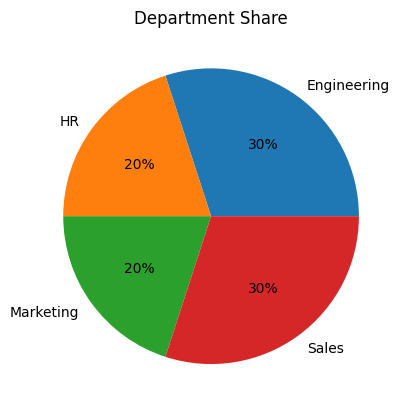

In [ ]:
# Pie chart
df.groupby("Department").size().plot.pie(autopct='%1.0f%%', title='Department Share')
plt.ylabel('') # Removes the default "y-axis" label (which doesn't make sense on a pie chart)
plt.show()

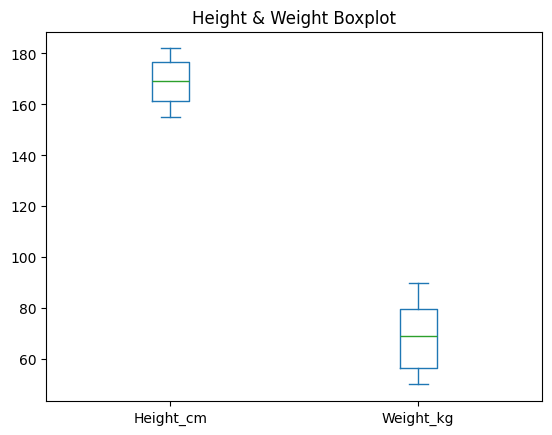

In [17]:
# Boxplot
df.plot.box(column=['Height_cm' , 'Weight_kg'])
plt.title('Height & Weight Boxplot')
plt.show()

### Type Conversion

In [18]:
# to_numeric
df['Score_str'] = df['Score'].astype(str)
df['Score_num'] = pd.to_numeric(df['Score_str'])

In [29]:
# to_datetime
date_df = pd.DataFrame({'join_date': ['2024-01-01', '2023-06-15', '2025-02-10']})
date_df['join_date'] = pd.to_datetime(date_df['join_date'])

In [26]:
date_df.head()

,join_date
0,2024-01-01
1,2023-06-15
2,2025-02-10


### Datetime

In [30]:
# Extracting datetime parts
date_df['year'] = date_df['join_date'].dt.year
date_df['month'] = date_df['join_date'].dt.month
date_df['quarter'] = date_df['join_date'].dt.quarter
print("\nDatetime Column Parts:\n", date_df)


Datetime Column Parts:
    join_date  year  month  quarter
0 2024-01-01  2024      1        1
1 2023-06-15  2023      6        2
2 2025-02-10  2025      2        1


### Mapping

In [ ]:
# Normalize height using lambda - it rescales them to be between 0 and 1
# Normalization formula : (x - min) / (max - min): This is the normalization formula:
df['Height_norm'] = df['Height_cm'].apply(lambda x: (x - df['Height_cm'].min()) / (df['Height_cm'].max() - df['Height_cm'].min()))

In [34]:
# Label department with mapping
dept_map = {'Sales': 'SLS', 'Engineering': 'ENG', 'HR': 'HUM', 'Marketing': 'MKT'}
df['DeptCode'] = df['Department'].map(dept_map)

print("\nMapped Columns:\n", df[['Name', 'Department', 'DeptCode', 'Height_norm']])


Mapped Columns:
       Name   Department DeptCode  Height_norm
0    Alice        Sales      SLS     0.370370
1      Bob  Engineering      ENG     0.925926
2  Charlie           HR      HUM     0.740741
3    Diana  Engineering      ENG     0.185185
4      Eve        Sales      SLS     0.000000
5    Frank           HR      HUM     0.555556
6    Grace    Marketing      MKT     0.481481
7     Hank    Marketing      MKT     1.000000
8      Ivy  Engineering      ENG     0.111111
9     Jack        Sales      SLS     0.814815


### Input/Output

In [ ]:
# Save to CSV
# df.to_csv("people.csv", index=False)
# write data to

# Load from CSV
# df_loaded = pd.read_csv("people.csv")
# read data from

# Copy to clipboard
# df.to_clipboard(index=False)

### Frequently Used Options

In [ ]:
# These are display settings in pandas, a Python library for working with data.
# They don’t change your data, but they change how it’s shown in your output window.

# # Show max 5 rows
pd.set_option('display.max_rows', 5)
print("\nMax 5 Rows Display:\n", df)

# Show all columns (set high number)
pd.set_option('display.max_columns', None)

# View precision
pd.set_option('display.precision', 2)
print("\nRounded Float Precision:\n", df[['Height_norm']])


Max 5 Rows Display:
      Name  Age  Height_cm  Weight_kg   Department  Score Score_str  Score_num  \
0   Alice   25        165         55        Sales     88        88         88   
1     Bob   30        180         85  Engineering     92        92         92   
..    ...  ...        ...        ...          ...    ...       ...        ...   
8     Ivy   26        158         52  Engineering     76        76         76   
9    Jack   31        177         80        Sales     84        84         84   

    Height_norm DeptCode  
0      0.370370      SLS  
1      0.925926      ENG  
..          ...      ...  
8      0.111111      ENG  
9      0.814815      SLS  

[10 rows x 10 columns]

Rounded Float Precision:
     Height_norm
0          0.37
1          0.93
..          ...
8          0.11
9          0.81

[10 rows x 1 columns]


### Series String Operations

In [36]:
df['Name_len'] = df['Name'].str.len()
df['Initial'] = df['Name'].str[0]
df['Upper'] = df['Name'].str.upper()
df['IsAlpha'] = df['Name'].str.isalpha()

print("\nString Operations:\n", df[['Name', 'Name_len', 'Initial', 'Upper', 'IsAlpha']])


String Operations:
      Name  Name_len Initial  Upper  IsAlpha
0   Alice         5       A  ALICE     True
1     Bob         3       B    BOB     True
..    ...       ...     ...    ...      ...
8     Ivy         3       I    IVY     True
9    Jack         4       J   JACK     True

[10 rows x 5 columns]


In [ ]:
# Concatenate string columns
df['Name_Dept'] = df['Name'].str.cat(df['Department'], sep=' - ')
print("\nName + Department:\n", df[['Name', 'Department', 'Name_Dept']])


Name + Department:
      Name   Department          Name_Dept
0   Alice        Sales      Alice - Sales
1     Bob  Engineering  Bob - Engineering
..    ...          ...                ...
8     Ivy  Engineering  Ivy - Engineering
9    Jack        Sales       Jack - Sales

[10 rows x 3 columns]


In [ ]:
# Replace values in string columns
df['Dept_Replaced'] = df['Department'].str.replace("Engineering", "Engg")
print("\nReplaced Department:\n", df[['Department', 'Dept_Replaced']])


Replaced Department:
      Department Dept_Replaced
0         Sales         Sales
1   Engineering          Engg
..          ...           ...
8   Engineering          Engg
9         Sales         Sales

[10 rows x 2 columns]
